
# Canonical Time Warping

This example illustrates the use of Canonical Time Warping (CTW) between time 
series and plots the matches obtained by the method [1]_.

Note that, contrary to Dynamic Time Warping (DTW) [2]_, CTW can almost retrieve
the ground-truth alignment (green matches) even when time series have suffered 
a rigid transformation (rotation+translation here).

The time series at stake in this example are color-coded trajectories whose 
starting (resp. end) point are depicted in blue (resp. red).
       
.. [1] F. Zhou and F. Torre, "Canonical time warping for alignment of human 
       behavior". NIPS 2009.

.. [2] H. Sakoe and S. Chiba, "Dynamic programming algorithm optimization
       for spoken word recognition". IEEE Transactions on Acoustics, Speech,
       and Signal Processing, 26(1), 43-49 (1978).


c:\Users\Yama\Documents\Iniciação Científica\Github\movimento\.venv\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


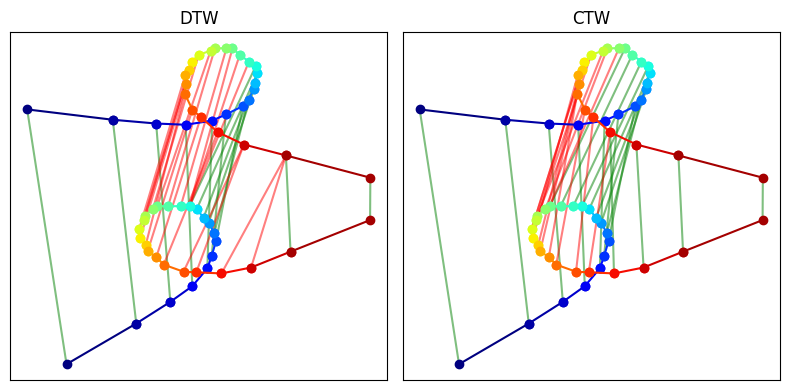

In [1]:
# Author: Romain Tavenard
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from tslearn.metrics import dtw_path, ctw_path

def plot_trajectory(ts, ax, color_code=None, alpha=1.):
    if color_code is not None:
        colors = [color_code] * len(ts)
    else:
        colors = plt.cm.jet(np.linspace(0, 1, len(ts)))
    for i in range(len(ts) - 1):
        ax.plot(ts[i:i+2, 0], ts[i:i+2, 1],
                marker='o', c=colors[i], alpha=alpha)


def get_rot2d(theta):
    return np.array(
        [[np.cos(theta), -np.sin(theta)],
         [np.sin(theta), np.cos(theta)]]
    )


def make_one_folium(sz, a=1., noise=.1, resample_fun=None):
    theta = np.linspace(0, 1, sz)
    if resample_fun is not None:
        theta = resample_fun(theta)
    theta -= .5
    theta *= .9 * np.pi
    theta = theta.reshape((-1, 1))
    r = a / 2 * (4 * np.cos(theta) - 1. / np.cos(theta))
    x = r * np.cos(theta) + np.random.rand(sz, 1) * noise
    y = r * np.sin(theta) + np.random.rand(sz, 1) * noise
    return np.array(np.hstack((x, y)))

trajectory = make_one_folium(sz=30).dot(get_rot2d(np.pi + np.pi / 3))
rotated_trajectory = trajectory.dot(get_rot2d(np.pi / 4)) + np.array([0., 3.])

path_dtw, _ = dtw_path(trajectory, rotated_trajectory)

path_ctw, cca, _ = ctw_path(trajectory, rotated_trajectory,
                            max_iter=100, n_components=2)

plt.figure(figsize=(8, 4))
ax = plt.subplot(1, 2, 1)
for (i, j) in path_dtw:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0]],
            [trajectory[i, 1], rotated_trajectory[j, 1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("DTW")

ax = plt.subplot(1, 2, 2)
for (i, j) in path_ctw:
    ax.plot([trajectory[i, 0], rotated_trajectory[j, 0]],
            [trajectory[i, 1], rotated_trajectory[j, 1]],
            color='g' if i == j else 'r', alpha=.5)
plot_trajectory(trajectory, ax)
plot_trajectory(rotated_trajectory, ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("CTW")

plt.tight_layout()
plt.show()